# Machine Learning Project
# Enterprise analytics

# Team members
#### Prafful Mundra        (18BCE0082)
#### Niket Jain                  (18BCE0337)
#### Siddharth Raj Dash (18BCE0347)


## Import necessary packages

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Import the dataset

In [2]:
dataset = pd.read_csv('churn_data.csv')

In [3]:
dataset.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


## Data preprocessing

### Removing NaN

In [6]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
#Getting dataset where column age is not null

dataset = dataset[pd.notnull(dataset['age'])]

In [9]:
#Dropping columns credit_scored and rewards_earned as they have huge no of nan

dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

## Data visualisation

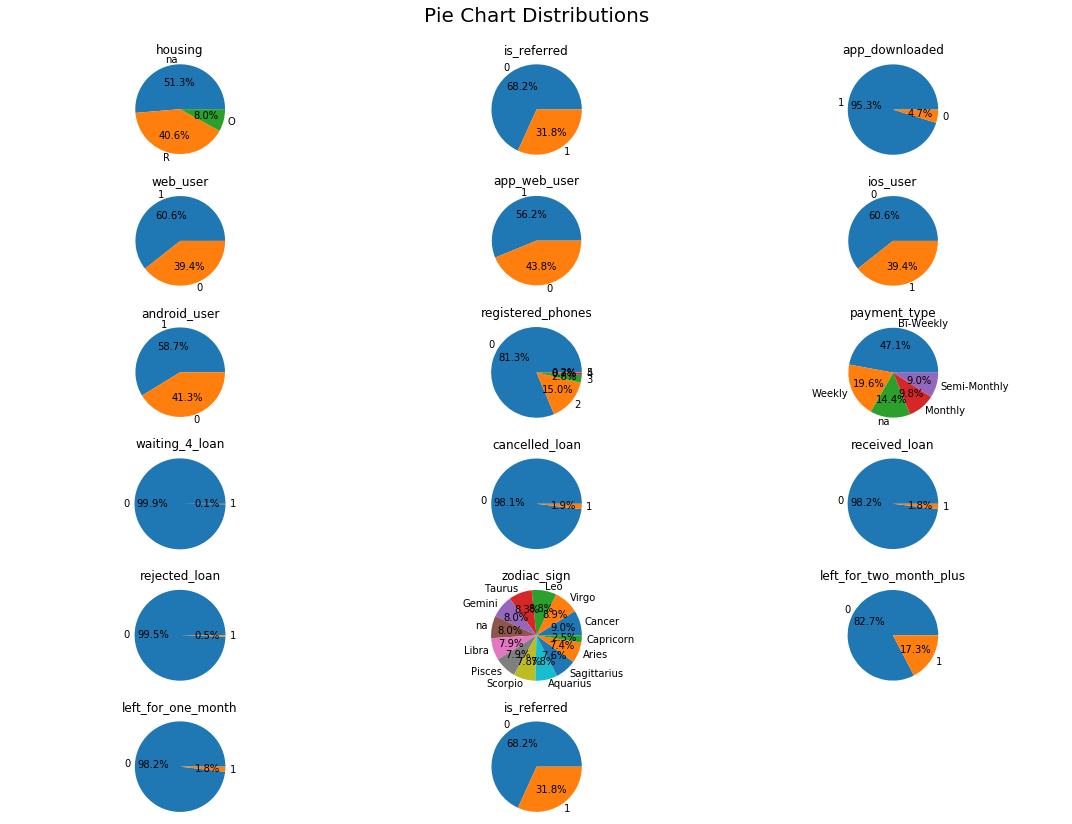

In [30]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Getting churn ratio where user waiting_4_loan

In [21]:

dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

### Getting churn ratio where user cancelled_loan

In [22]:

dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

### Getting churn ratio where user received_loan

In [23]:

dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

### Getting churn ratio where user rejected_loan

In [24]:

dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

### Getting churn ratio where user left for one month

In [25]:

dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Correlation plot with target data
### Drop categorical data then plot

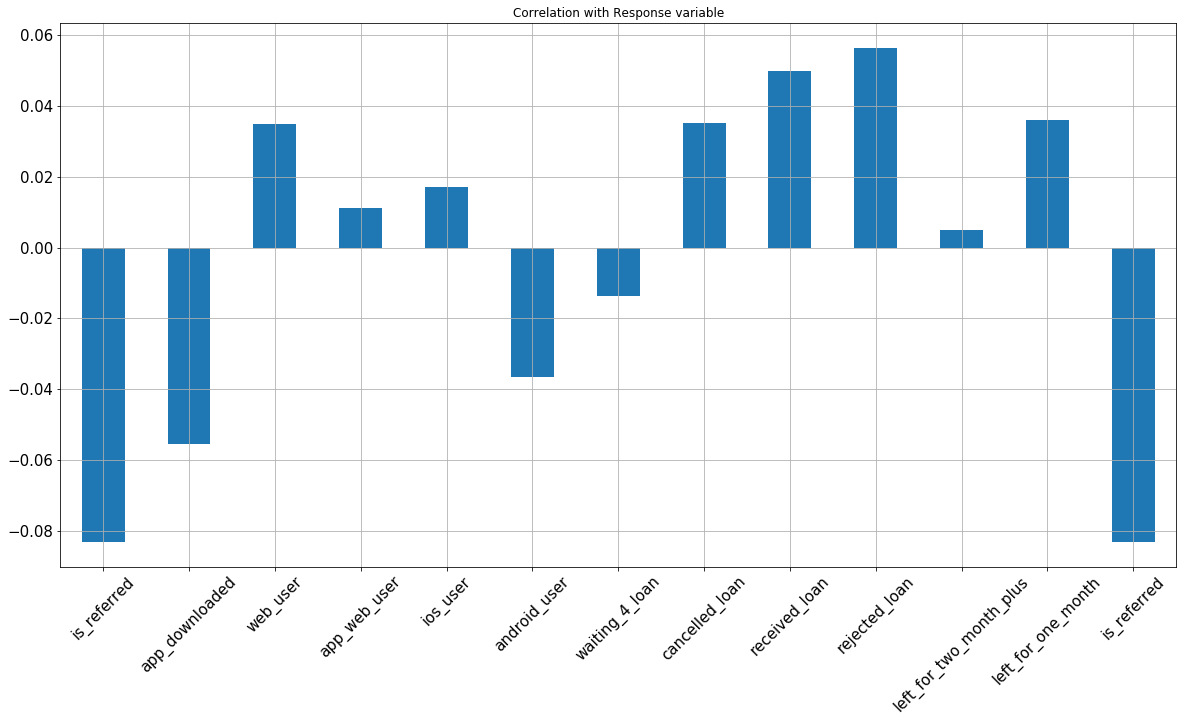

In [31]:

dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

## More visualization

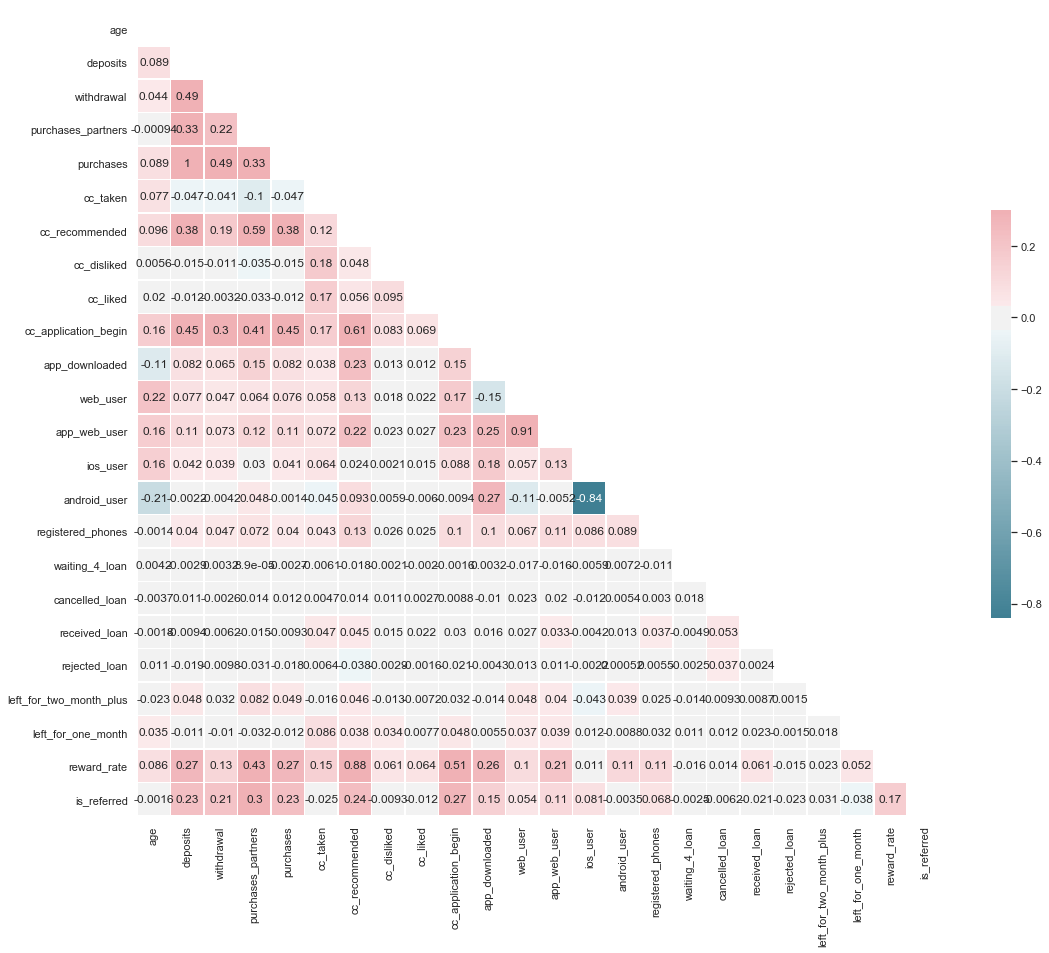

In [32]:
## Correlation Matrix
sn.set(style="white")


# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))


# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [33]:
# Removing Correlated Fields

dataset = dataset.drop(columns = ['app_web_user'])

In [34]:
#save our prepared dataset to new_churn_data

dataset.to_csv('new_churn_data.csv', index = False)

## Data preparation

In [35]:
# Dropping attribute user as it is not useful


user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [36]:
# One-Hot Encoding
#Get dummies data for categorial variable


dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [37]:
# Dropping categorical data where they are na

dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

## Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

## Balancing the Training Set

In [39]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [40]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [41]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [43]:
import random
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [45]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11572,-0.629054,-0.258361,-0.29094,0.487171,-0.255882,-0.165814,-0.472506,-0.058110,-0.069033,-0.258910,...,-0.310232,6.310642,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
14318,-0.729144,-0.367346,-0.29094,1.307537,-0.367002,-0.165814,1.582293,-0.058110,-0.069033,-0.179132,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,3.408003,-0.299619,-0.313539
11697,-0.629054,-0.367346,-0.29094,-0.614464,-0.367002,-0.165814,-0.932870,-0.058110,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
16715,-1.029415,-0.367346,-0.29094,-0.216000,-0.367002,-0.165814,-0.955327,-0.058110,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
19770,-0.428873,-0.367346,-0.29094,-0.661342,-0.367002,-0.165814,0.279798,1.094277,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,3.385503,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539


In [46]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2835,-0.028512,0.831483,-0.290940,-0.637903,0.855323,2.072260,1.189299,-0.058110,-0.069033,1.815324,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,3.458726,-0.293427,-0.299619,-0.313539
21022,-0.729144,-0.367346,-0.290940,2.338855,-0.367002,-0.165814,1.649663,-0.058110,-0.069033,-0.418466,...,-0.310232,-0.158462,3.384441,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
5592,1.472841,0.831483,1.587988,-0.661342,0.855323,-0.165814,0.392082,2.246665,-0.069033,2.134437,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,3.337575,-0.313539
15773,0.071578,-0.367346,-0.290940,-0.473830,-0.367002,-0.165814,-1.022698,-0.058110,-0.069033,-0.578023,...,-0.310232,6.310642,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
15123,-1.029415,0.286561,-0.290940,3.018587,0.299721,-0.165814,1.683349,-0.058110,-0.069033,2.054658,...,-0.310232,-0.158462,-0.295470,3.216892,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539


## Model Building

### Fitting Model to the Training Set

In [56]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting Test Set

In [57]:

y_pred = classifier.predict(X_test)

## Evaluating the model

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score: ")
accuracy_score(y_test, y_pred)

Accuracy Score: 


0.6431481481481481

In [59]:
print("Precision score: ",precision_score(y_test, y_pred)) # tp / (tp + fp)

Precision score:  0.5823939881910897


In [60]:
print("Recall score: ",recall_score(y_test, y_pred)) # tp / (tp + fn)

Recall score:  0.4856759176365264


In [61]:
print("f1-score: ", f1_score(y_test, y_pred))

f1-score:  0.5296558457407861


Confusion Matrix:
Test Data Accuracy: 0.6431


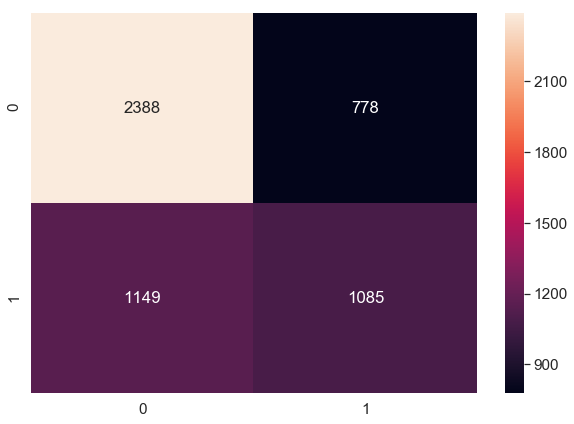

In [62]:
print("Confusion Matrix:")
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Ensemble-Learning

## Ensemble-learning: Applying k-Fold Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [64]:
accuracies

array([0.65462963, 0.6625    , 0.6412037 , 0.65648148, 0.64722222,
       0.63287037, 0.65956461, 0.65261695, 0.64844836, 0.65956461])

In [65]:
accuracies.mean()

0.6515101941914123

In [66]:
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.652 (+/- 0.018)


### Analyzing Coefficients

In [67]:

pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.169526
1,deposits,0.297026
2,withdrawal,0.050365
3,purchases_partners,-0.778664
4,purchases,-0.433587
5,cc_taken,0.070412
6,cc_recommended,0.075473
7,cc_disliked,-0.013436
8,cc_liked,0.000114
9,cc_application_begin,0.027466


## Feature Selection-Recursive Feature Elimination for faster processing with same accuracy

In [70]:
# Recursive Feature Elimination for faster processing with same accuracy

from sklearn.feature_selection import RFE
classifier = LogisticRegression(solver='lbfgs')

In [71]:
# Select Best X Features

rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [72]:
# summarize the selection of the attributes

print("Attributes which will be include:")
print(rfe.support_)

Attributes which will be include:
[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True  True  True  True False  True
  True False False False  True False False False False False False False
 False False False False False]


In [73]:
#rfe ranking 

print(rfe.ranking_)

[ 1  1  1  1  1  1  1 14 22  3 18  1  1 19  1  1  1  1  1  1  1  1  7  1
  1  4 12  5  1  6 17 15  2  8 20 10 13 21 11  9 16]


In [74]:
print("Columns which will be included:")
X_train.columns[rfe.support_]

Columns which will be included:


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O', 'housing_R',
       'payment_type_Weekly'],
      dtype='object')

In [75]:
rfe = rfe.fit(X_train, y_train)

#### Fitting Model to the Training Set

In [87]:
# Fitting Model to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
# Predicting Test Set

y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

#### evaluating results

In [89]:
# Evaluating Results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:")
accuracy_score(y_test, y_pred)

Accuracy:


0.645

In [90]:
print("Precision Score: ", precision_score(y_test, y_pred)) # tp / (tp + fp)

Precision Score:  0.584804708400214


In [91]:
print("Recall Score: ",recall_score(y_test, y_pred)) # tp / (tp + fn)

Recall Score:  0.4892569382273948


In [92]:
print("Recall Score: ",f1_score(y_test, y_pred))

Recall Score:  0.5327808920302218


Confusion Matrix:


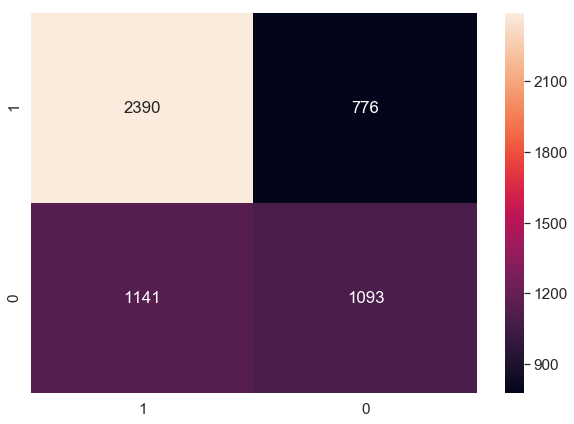

In [93]:
print("Confusion Matrix:")
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

### Applying k-Fold Cross Validation 

In [94]:
# Applying k-Fold Cross Validation another time

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy: 0.654 (+/- 0.018)


In [95]:
# Analyzing Coefficients

pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.164102
1,deposits,0.305751
2,withdrawal,0.055437
3,purchases_partners,-0.768093
4,purchases,-0.434858
5,cc_taken,0.072335
6,cc_recommended,0.093513
7,web_user,0.134666
8,ios_user,0.072304
9,registered_phones,0.094386


## Final Results - users likely to churn

In [96]:
# Formatting Final Results

final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [97]:
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0


# Conclusion
Our model has provided us with an indication of which users are likely to churn. We have purposefully left the date of expected churn open-ended because we are gauging the features that indicate disengagement with the product, and not the exact manner (like timeframe) in which users will disengage. Who get a sense of those users who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the product. If, after creating new product features, we start seeing our model predict that less of our users are going to churn then we can assume our customers are feeling more engaged with what we are offering them. We can move forward with these efforts by enquiring the opinions of our users about new features. 
